<a href="https://colab.research.google.com/github/micheldc55/Reinforced_Learning/blob/main/RL_1_basic_vs_egreedy_myver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estrategia $\epsilon$-greedy con bandits Gaussianos**

- El agente puede tomar 3 acciones ("bandits"): 1, 2, 3
- El resultado de la acción i tiene un reward r_i
- El r_i sigue una distribución gaussiana con media m_i y desviación estándar std_i
- Los 6 parámetros (m_1, std_1, m_2, std_2, m3, std_3) son inicialmente desconocidos para el agente
- El agente tiene que tomar decisiones una y otra vez
- Su objetivo es maximizar su beneficio

In [ ]:
# Adaptado de:
#
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python

In [ ]:
!ls

sample_data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm as gaussiana

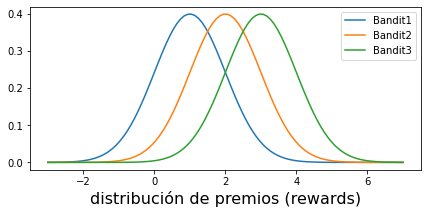

In [ ]:
m1   = 1. # medias y desviaciones estándar de los premios (rewards) que da cada bandit
std1 = 1
m2   = 2
std2 = 1
m3   = 3.
std3 = 1

plt.figure(figsize=(7,3))
premios = np.linspace(-3,7,100)
plt.plot(premios, gaussiana.pdf(x=premios, loc=m1, scale=std1), label='Bandit1')
plt.plot(premios, gaussiana.pdf(x=premios, loc=m2, scale=std2), label='Bandit2')
plt.plot(premios, gaussiana.pdf(x=premios, loc=m3, scale=std3), label='Bandit3')
plt.xlabel('distribución de premios (rewards)', fontsize=16)
plt.legend();

In [ ]:
# Simulación de las máquinas tragaperras

class Bandit:
    def __init__(self, mean, std=1, addseed=0): # se inicializa bandit
        self.mean = mean
        np.random.seed(1234567+int(str(mean).replace(".",""))+addseed)
        # se generan todas las futuras salidas de Bandit
        self.maxpulls = 1000000
        self.futurepulls = self.mean + std*np.random.randn(self.maxpulls)
        self.n = 0 # la primera salida
    
    def pull(self): # se acciona bandit
        aux = self.futurepulls[self.n]
        self.n = self.n + 1
        
        if self.n == self.maxpulls:
            self.n = 0
        
        # el if anterior es equivalente a:
        # self.n = (self.n + 1) % self.maxpulls
        return aux

In [ ]:
m1, std1

(1.0, 1)

In [ ]:
bandit1 = Bandit(m1, std1)

In [ ]:
bandit1

In [ ]:
bandit1.futurepulls  # Futuros premios de la máquina (los calcula manuel en la clase Bandit() en self.futurepulls)

array([ 1.64537563,  0.39916286,  2.0626057 , ...,  0.39802809,
        1.07469068, -0.3641533 ])

In [ ]:
bandit1.pull()

1.645375630631098

In [ ]:
len(bandit1.futurepulls)

1000000

In [ ]:
bandit1.pull()

0.3991628573871264

In [ ]:
bandit1.pull()

2.0626057016223527

In [ ]:
bandit1.pull()

0.8215971345861959

In [ ]:
N=10000
premios1 = [bandit1.pull() for _ in range(N)]

In [ ]:
premios1[:10]

[0.19756718115157557,
 1.0450912845770286,
 0.5636865217365836,
 0.7190230719845304,
 0.26936601688325057,
 0.17796934640860373,
 0.024942227139659545,
 0.8902535855162822,
 0.6822010745903749,
 2.2386981876296304]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


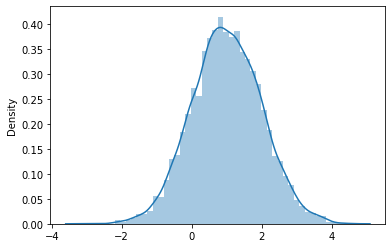

In [ ]:
sns.distplot(premios1);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

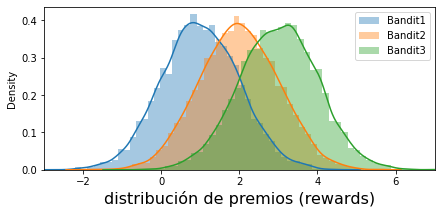

In [ ]:
bandit1 = Bandit(m1, std1)
bandit2 = Bandit(m2, std2)
bandit3 = Bandit(m3, std3)

premios1 = [bandit1.pull() for _ in range(N)]
premios2 = [bandit2.pull() for _ in range(N)]
premios3 = [bandit3.pull() for _ in range(N)]

plt.figure(figsize=(7,3))
sns.distplot(premios1, label='Bandit1')
sns.distplot(premios2, label='Bandit2')
sns.distplot(premios3, label='Bandit3')
plt.xlim(-3,7)
plt.xlabel('distribución de premios (rewards)', fontsize=16)
plt.legend();

In [ ]:
N = 100000

In [ ]:
class estimacion_Bandit: # estimación del valor Q del Bandit
    def __init__(self):
        # se inicializan todas las estimaciones a 0
        self.suma_premios = 0
        self.N = 0
        self.mean = 0
        
    def update(self, x): # ahora obtengo premio x en la máquina
        self.suma_premios += x
        self.N += 1
        self.mean = self.suma_premios / self.N # estimación de Q

In [ ]:
estimacion = estimacion_Bandit()
estimacion

In [ ]:
estimacion.suma_premios, estimacion.N, estimacion.mean

(0, 0, 0)

In [ ]:
estimacion.update(10)
estimacion.suma_premios, estimacion.N, estimacion.mean

(10, 1, 10.0)

In [ ]:
estimacion.update(1)
estimacion.suma_premios, estimacion.N, estimacion.mean

(11, 2, 5.5)

In [ ]:
estimacion.update(0)
estimacion.suma_premios, estimacion.N, estimacion.mean

(11, 3, 3.6666666666666665)

In [ ]:
# Estrategia básica:
# - Primero se explora aleatoriamente
# - Cuando se ha explorado aleatoriamente, se procede a elegir siempre el bandit con mejor
#   estadística en la fase de exploración

def run_experiment_basic(bandits, N_total, N_explore, vis=True):
    estimated_bandits = [estimacion_Bandit() for _ in bandits]
    
    rewards = np.empty(N_total)
    
    for i in range(N_total):
        if i < N_explore: # fase de exploración (elijo una máquina al azar)
            j = np.random.choice(3)
        else: # fase de explotación: elijo la máquina con mayor mean (Q estimada)
            j = np.argmax([y.mean for y in estimated_bandits])
        
        x = bandits[j].pull()
        estimated_bandits[j].update(x)
        # para dibujar luego:
        rewards[i] = x
        
    cumulative_reward  = np.cumsum(rewards)
    cumulative_average = cumulative_reward / (np.arange(N) + 1)

    if vis:
        # plot moving average ctr
        plt.figure(figsize=(7,3))
        x = np.array(range(1,N+1))
        plt.plot(x, N*[bandits[0].mean], label='bandit 1 real mean')
        plt.plot(x, N*[bandits[1].mean], label='bandit 2 real mean')
        plt.plot(x, N*[bandits[2].mean], label='bandit 3 real mean')
        plt.plot(x, cumulative_average, label='average reward')
        plt.title('basic, N_explore={}'.format(N_explore), fontsize=16)
        plt.xscale('log')
        plt.legend(loc=4)
        plt.show()
    
        for i,b in enumerate(estimated_bandits):
            print('media estimada del bandit {}: {}'.format(i+1,np.round(b.mean,3)))
    
    return cumulative_reward, cumulative_average

In [ ]:
np.random.choice(10)

3

In [ ]:
def run_experiment_egreedy(bandits, epsilon, N_total, vis=True):
    estimated_bandits = [estimacion_Bandit() for _ in bandits]
    
    rewards = np.empty(N_total)
    
    for i in range(N_total):
        # epsilon greedy
        p = np.random.random()
        if p < epsilon: # explorar
            j = np.random.choice(3)
        else: # explotar
            j = np.argmax([b.mean for b in estimated_bandits])
        
        x = bandits[j].pull()
        estimated_bandits[j].update(x)
        # para dibujar:
        rewards[i] = x
        
    cumulative_reward  = np.cumsum(rewards)
    cumulative_average = cumulative_reward / (np.arange(N) + 1)

    if vis:
        # plot moving average ctr
        plt.figure(figsize=(7,3))
        x = np.array(range(1,N+1))
        plt.plot(x, N*[bandits[0].mean], label='bandit 1 real mean')
        plt.plot(x, N*[bandits[1].mean], label='bandit 2 real mean')
        plt.plot(x, N*[bandits[2].mean], label='bandit 3 real mean')
        plt.plot(x, cumulative_average, label='average reward')
        plt.title('$\epsilon$-greedy, $\epsilon$={}'.format(epsilon), fontsize=16)
        plt.xscale('log')
        plt.legend(loc=4)
        plt.show()
    
        for i,b in enumerate(estimated_bandits):
            print('media estimada del bandit {}: {}'.format(i+1,np.round(b.mean,3)))
    
    return cumulative_reward, cumulative_average

In [ ]:
def run_experiment_egreedy_edecay(bandits, k, N_total, vis=True):
    estimated_bandits = [estimacion_Bandit() for _ in bandits]
    
    rewards = np.empty(N_total)
    #epsilon = 1.
    epsilons = []
    for i in range(N_total):
        epsilon = min(1, k/(i+1))  ## si k=100 -> epsilon=1 hasta que pongo 99 monedas, luego epsilon < 1.
        epsilons.append(epsilon)
        # epsilon greedy
        p = np.random.random()
        if p < epsilon: # explorar
            j = np.random.choice(3)
        else: # explotar
            j = np.argmax([b.mean for b in estimated_bandits])
        
        x = bandits[j].pull()
        estimated_bandits[j].update(x)
        # para dibujar:
        rewards[i] = x
        
    cumulative_reward  = np.cumsum(rewards)
    cumulative_average = cumulative_reward / (np.arange(N) + 1)

    if vis:
        # plot moving average ctr
        plt.figure(figsize=(7,3))
        x = np.array(range(1,N+1))
        plt.plot(x, N*[bandits[0].mean], label='bandit 1 real mean')
        plt.plot(x, N*[bandits[1].mean], label='bandit 2 real mean')
        plt.plot(x, N*[bandits[2].mean], label='bandit 3 real mean')
        plt.plot(x, cumulative_average, label='average reward')
        plt.title('$\epsilon$-greedy, $\epsilon$={}'.format(epsilon), fontsize=16)
        plt.xscale('log')
        plt.legend(loc=4)
        plt.show()
        plt.figure(figsize=(7,3))
        x = np.array(range(1,N+1))
        plt.plot(x, epsilons, label='epsilon')
        plt.legend(loc=4)
        plt.xscale('log')
        plt.show()
    
        for i,b in enumerate(estimated_bandits):
            print('media estimada del bandit {}: {}'.format(i+1,np.round(b.mean,3)))
    
    return cumulative_reward, cumulative_average

In [ ]:
def run_experiment_egreedy_edecay2(bandits, decay, N_total, vis=True):
    estimated_bandits = [estimacion_Bandit() for _ in bandits]
    # decay: (0,1)
    rewards = np.empty(N_total)
    epsilon = 1.
    epsilons = []
    for i in range(N_total):
        epsilons.append(epsilon)
        # epsilon greedy
        p = np.random.random()
        if p < epsilon: # explorar
            j = np.random.choice(3)
        else: # explotar
            j = np.argmax([b.mean for b in estimated_bandits])
        
        x = bandits[j].pull()
        estimated_bandits[j].update(x)
        # para dibujar:
        rewards[i] = x
        epsilon = epsilon*decay
        
    cumulative_reward  = np.cumsum(rewards)
    cumulative_average = cumulative_reward / (np.arange(N) + 1)

    if vis:
        # plot moving average ctr
        plt.figure(figsize=(7,3))
        x = np.array(range(1,N+1))
        plt.plot(x, N*[bandits[0].mean], label='bandit 1 real mean')
        plt.plot(x, N*[bandits[1].mean], label='bandit 2 real mean')
        plt.plot(x, N*[bandits[2].mean], label='bandit 3 real mean')
        plt.plot(x, cumulative_average, label='average reward')
        plt.title('$\epsilon$-greedy, $\epsilon$={}'.format(epsilon), fontsize=16)
        plt.xscale('log')
        plt.legend(loc=4)
        plt.show()
        plt.figure(figsize=(7,3))
        x = np.array(range(1,N+1))
        plt.plot(x, epsilons, label='epsilon')
        plt.legend(loc=4)
        #plt.xscale('log')
        plt.show()
    
        for i,b in enumerate(estimated_bandits):
            print('media estimada del bandit {}: {}'.format(i+1,np.round(b.mean,3)))
    
    return cumulative_reward, cumulative_average

**Experimento básico**

In [ ]:
m1, std1, m2, std2, m3, std3

(1.0, 1, 2, 1, 3.0, 1)

In [ ]:
N

100000

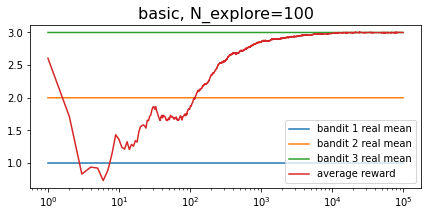

media estimada del bandit 1: 0.888
media estimada del bandit 2: 2.045
media estimada del bandit 3: 3.0


In [ ]:
bandit1 = Bandit(m1, std1, addseed=10)
bandit2 = Bandit(m2, std2, addseed=10)
bandit3 = Bandit(m3, std3, addseed=10)

#N_explore_basic = 5  # Si elijo un número bajo como 5, el modelo elige la máquina que gana en pocos intentos que puede no ser la de media 3.
N_explore_basic = 100 # Si elijo un número mayor, casi seguro sale la tercera!
total_reward_basic, average_reward_basic  = run_experiment_basic([bandit1, bandit2, bandit3],
                                                                 N_total=N, N_explore=N_explore_basic)

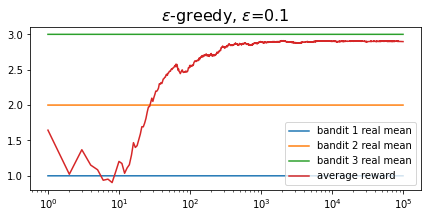

media estimada del bandit 1: 1.003
media estimada del bandit 2: 1.984
media estimada del bandit 3: 2.999






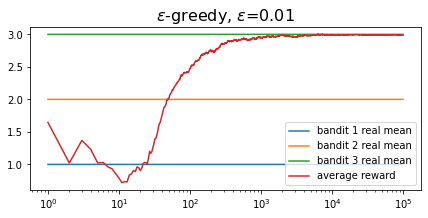

media estimada del bandit 1: 1.018
media estimada del bandit 2: 1.923
media estimada del bandit 3: 2.998






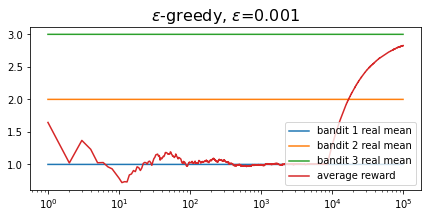

media estimada del bandit 1: 1.004
media estimada del bandit 2: 1.66
media estimada del bandit 3: 2.999






In [ ]:
epsilons = [1e-1, 1e-2, 1e-3]

total_rewards = []
average_rewards = []
for e in epsilons:
    bandit1 = Bandit(m1, std1)
    bandit2 = Bandit(m2, std2)
    bandit3 = Bandit(m3, std3)

    total_reward, average_reward  = run_experiment_egreedy([bandit1, bandit2, bandit3],
                                                           epsilon=e, N_total=N)
    total_rewards.append(total_reward)
    average_rewards.append(average_reward)
    print("\n\n\n")

Ver que a medida que el epsilon muy pequeño hace que el modelo no explore mucho y por lo tanto es mucho más lento en encontrar el resultado óptimo. También es cierto que va a tener menos error al final, porque al agregar la exploración también me separo del comportamiento óptimo que me llegaría a invertir siempre la máquina 3. Por eso todas están separadas del 3.0. Ver también que si dejara el experimiento con epsilon=0.001 hasta el final, llegaría más cerca de 3, pero súper lento. **Lo óptimo sería la estrategia intermedia**.

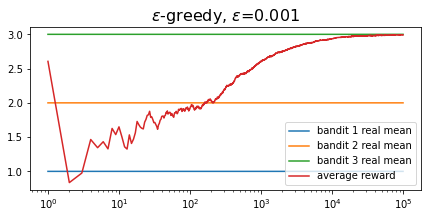

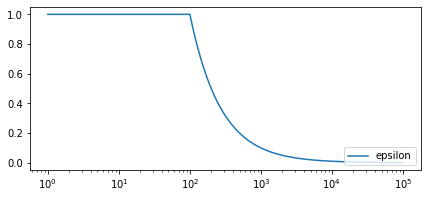

media estimada del bandit 1: 0.866
media estimada del bandit 2: 2.025
media estimada del bandit 3: 3.0


In [ ]:
bandit1 = Bandit(m1, std1, addseed=10)
bandit2 = Bandit(m2, std2, addseed=10)
bandit3 = Bandit(m3, std3, addseed=10)
bandits = [bandit1, bandit2, bandit3]

N = 100000
k = 100
total_reward_basic, average_reward_basic = run_experiment_egreedy_edecay(bandits, k, N)

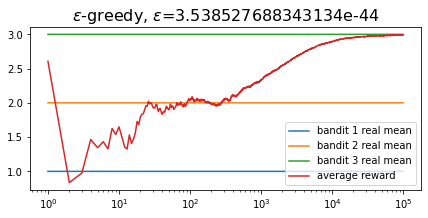

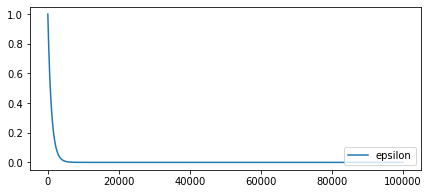

media estimada del bandit 1: 0.881
media estimada del bandit 2: 1.996
media estimada del bandit 3: 3.0


In [ ]:
bandit1 = Bandit(m1, std1, addseed=10)
bandit2 = Bandit(m2, std2, addseed=10)
bandit3 = Bandit(m3, std3, addseed=10)
bandits = [bandit1, bandit2, bandit3]

N = 100000
decay = 0.999 # epsilon = epsilon_ini*exp(-k*t)
total_reward_basic, average_reward_basic = run_experiment_egreedy_edecay2(bandits, decay, N)

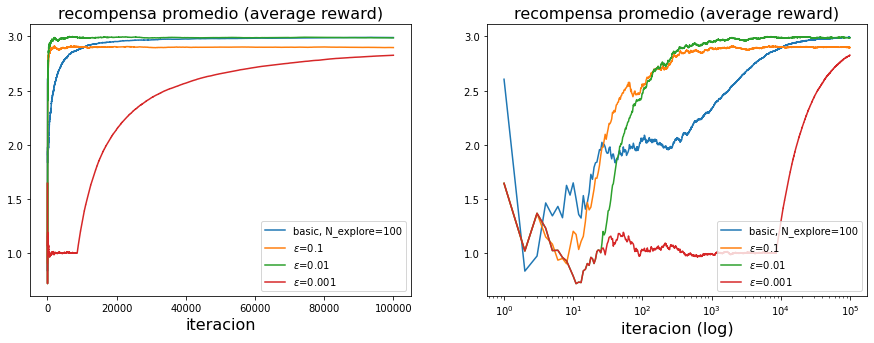

In [ ]:
plt.figure(figsize=(15,5))

# linear plot
plt.subplot(1,2,1)
x = np.array(range(1,N+1))
plt.plot(x, average_reward_basic, label='basic, N_explore={}'.format(N_explore_basic))
for average_reward, e in zip(average_rewards, epsilons):
    plt.plot(x, average_reward, label='$\epsilon$={}'.format(e))
plt.legend(loc=4)
plt.xlabel('iteracion', fontsize=16)
plt.title('recompensa promedio (average reward)', fontsize=16)

# log scale plot
plt.subplot(1,2,2)
plt.plot(x, average_reward_basic, label='basic, N_explore={}'.format(N_explore_basic))
for average_reward, e in zip(average_rewards, epsilons):
    plt.plot(x, average_reward, label='$\epsilon$={}'.format(e))
plt.legend(loc=4)
plt.xscale('log')
plt.xlabel('iteracion (log)', fontsize=16)
plt.title('recompensa promedio (average reward)', fontsize=16);

Ver que en este caso el mejor es el azul o el verde, porque al final son los que dan el mejor resultado.

**Coste de oportunidad: para calcularlo hay que calcular el premio que consigo si desde el inicio apuesto "con trampa" al mejor bandit**

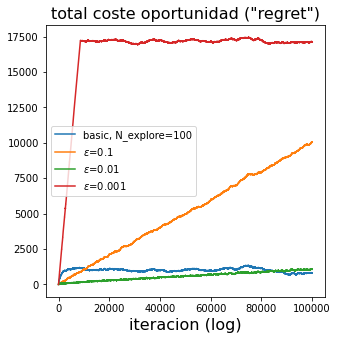

In [ ]:
plt.figure(figsize=(5,5))
max_m = max([m1,m2,m3])
optimal_bandit = Bandit(max_m)
optimal_gains = [optimal_bandit.pull() for _ in range(N)]

plt.plot(x, np.cumsum(optimal_gains) - total_reward_basic, label='basic, N_explore={}'.format(N_explore_basic))
for total_reward, e in zip(total_rewards, epsilons):
    plt.plot(x, np.cumsum(optimal_gains) - total_reward, label='$\epsilon$={}'.format(e))
plt.legend(loc=0)
plt.xlabel('iteracion (log)', fontsize=16)
plt.title('total coste oportunidad ("regret")', fontsize=16);

**Ahora hago un promedio de diferentes repeticiones**

Debajo probamos los algoritmos variando la semilla inicial, para modelar mejor la distribución de los datos. Ver que en este caso la mejor técnica es la del epsilon marrón (edecay2), que usa la estrategia de decay que explora al principio y al final lo hace cada vez menos. Los plots están 7 comandos más abajo!

Ver también que los costes de oportunidad de las estrategias de decay exponencial son de forma logarítmica, y por tanto mejores que los greedy que tienen un costo de oportunidad lineal.

In [ ]:
Nreps = 50
N = 10000
total_reward_matrix = np.empty((4,Nreps,N))
average_reward_matrix = np.empty((4,Nreps,N))
for i,e in enumerate([-1]+epsilons):
    for rep in range(Nreps):
        if e == -1:
            print("\rbasic, N_explore={}, repetición {}/{}".format(N_explore_basic, rep+1, Nreps),end="")
            bandits = [Bandit(m1, std1, addseed=rep),
                       Bandit(m2, std2, addseed=rep),
                       Bandit(m3, std3, addseed=rep)]
            total_reward, average_reward  = run_experiment_basic(bandits, N_total=N,
                                                                 N_explore=N_explore_basic,
                                                                 vis=False)
        else:
            print("\repsilon={}, repetición {}/{}".format(e, rep+1, Nreps),end="")
            bandits = [Bandit(m1, std1, addseed=rep),
                       Bandit(m2, std2, addseed=rep),
                       Bandit(m3, std3, addseed=rep)]
            total_reward, average_reward  = run_experiment_egreedy(bandits, epsilon=e,
                                                                   N_total=N, vis=False)
        
        total_reward_matrix[i][rep] = total_reward
        average_reward_matrix[i][rep] = average_reward
    print()

basic, N_explore=100, repetición 50/50
epsilon=0.1, repetición 50/50
epsilon=0.01, repetición 50/50
epsilon=0.001, repetición 50/50


In [ ]:
Nreps, N

(50, 10000)

In [ ]:
total_reward_edecay = np.empty((Nreps,N))
average_reward_edecay = np.empty((Nreps,N))

for rep in range(Nreps):
    bandits = [Bandit(m1, std1, addseed=rep),
               Bandit(m2, std2, addseed=rep),
               Bandit(m3, std3, addseed=rep)]
    total_reward, average_reward = run_experiment_egreedy_edecay(bandits, k=100, N_total=N, vis=False)
    
    total_reward_edecay[rep] = total_reward
    average_reward_edecay[rep] = average_reward

In [ ]:
total_reward_edecay.shape, average_reward_edecay.shape

((50, 10000), (50, 10000))

In [ ]:
total_reward_edecay2 = np.empty((Nreps,N))
average_reward_edecay2 = np.empty((Nreps,N))

for rep in range(Nreps):
    bandits = [Bandit(m1, std1, addseed=rep),
               Bandit(m2, std2, addseed=rep),
               Bandit(m3, std3, addseed=rep)]
    total_reward, average_reward = run_experiment_egreedy_edecay2(bandits, N_total=N, decay = 0.99, vis=False)
    
    total_reward_edecay2[rep] = total_reward
    average_reward_edecay2[rep] = average_reward

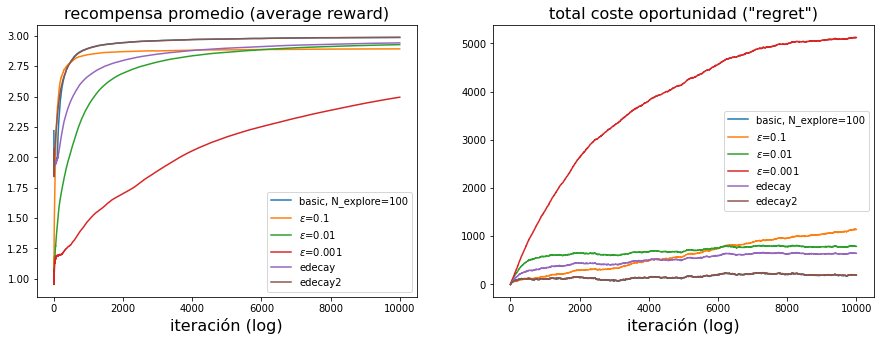

In [ ]:
plt.figure(figsize=(15,5))
x = np.array(range(1,N+1))
aux_a = average_reward_matrix.mean(axis=1)
aux_a_std = average_reward_matrix.std(axis=1)
# log scale plot
plt.subplot(1,2,1)
for i in range(4):
    if i == 0:
        plt.plot(x, aux_a[0], label='basic, N_explore={}'.format(N_explore_basic))
    else:
        plt.plot(x, aux_a[i], label='$\epsilon$={}'.format(epsilons[i-1]))
plt.plot(x, average_reward_edecay.mean(axis=0), label='edecay')
plt.plot(x, average_reward_edecay2.mean(axis=0), label='edecay2')

plt.legend(loc=4)
plt.xlabel('iteración (log)', fontsize=16)
plt.title('recompensa promedio (average reward)', fontsize=16)

aux_t = total_reward_matrix.mean(axis=1)
aux_t_std = total_reward_matrix.std(axis=1)
plt.subplot(1,2,2)
max_m = max([m1,m2,m3])
optimal_bandit = Bandit(mean=max_m)
optimal_gains = [optimal_bandit.pull() for _ in range(N)]

for i in range(4):
    if i==0:
        plt.plot(x, np.cumsum(optimal_gains) - aux_t[i], label='basic, N_explore={}'.format(N_explore_basic))
    else:
        plt.plot(x, np.cumsum(optimal_gains) - aux_t[i], label='$\epsilon$={}'.format(epsilons[i-1]))

plt.plot(x, np.cumsum(optimal_gains) - total_reward_edecay.mean(axis=0), label='edecay')
plt.plot(x, np.cumsum(optimal_gains) - total_reward_edecay2.mean(axis=0), label='edecay2')

plt.legend(loc=0)
plt.xlabel('iteración (log)', fontsize=16)
plt.title('total coste oportunidad ("regret")', fontsize=16);